In [145]:
import pandas as pd

weather = pd.read_csv(r"C:\Users\siddh\Desktop\2942030.csv", index_col = "DATE")

In [20]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.95,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,12.30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,3.80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
#data cleanup
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653545
ACSH       0.653545
AWND       0.522113
DAPR       0.999526
FMTM       0.870168
FRGT       0.999881
MDPR       0.999526
PGTM       0.495435
PRCP       0.016659
SNOW       0.325350
SNWD       0.317999
TAVG       0.879239
TMAX       0.000534
TMIN       0.000593
TSUN       0.931764
WDF1       0.653545
WDF2       0.522054
WDF5       0.527211
WDFG       0.747036
WSF1       0.653545
WSF2       0.521994
WSF5       0.527211
WSFG       0.747036
WT01       0.779701
WT02       0.980258
WT03       0.992945
WT04       0.999763
WT05       0.998340
WT07       0.999881
WT08       0.810292
WT09       0.999881
WT16       0.884100
WT18       0.999822
dtype: float64

In [149]:
#selecting most important weather values from the documentation
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
#renaming the columns for ease
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [154]:
core_weather.apply(pd.isnull).sum()

precip         281
snow          5488
snow_depth    5364
temp_max         9
temp_min        10
dtype: int64

In [155]:
core_weather["snow"].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [156]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [30]:
#since it snowed only one day since 1960, it is not important, so we remove the column
del core_weather["snow"]

In [34]:
#since it snowed only one day the snow won't accumulate and data also shows 0
del core_weather["snow_depth"]

In [36]:
#checking precp
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [157]:
#taking a look at the missing data
core_weather.loc["2013-12-15",:]

precip         NaN
snow           NaN
snow_depth     NaN
temp_max      58.0
temp_min      33.0
Name: 2013-12-15, dtype: float64

In [158]:
core_weather["precip"].value_counts() / core_weather.shape[0]

0.00    0.810588
0.01    0.025966
0.02    0.011797
0.03    0.007233
0.04    0.006047
          ...   
1.29    0.000059
1.73    0.000059
1.05    0.000059
1.38    0.000059
1.02    0.000059
Name: precip, Length: 176, dtype: float64

In [159]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [160]:
core_weather.apply(pd.isnull).sum()

precip           0
snow          5488
snow_depth    5364
temp_max         9
temp_min        10
dtype: int64

In [161]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2004-11-20,0.0,NaN,NaN,NaN,NaN
2011-12-21,0.0,0.0,0.0,61.0,NaN
2011-12-22,0.0,0.0,0.0,62.0,NaN
2011-12-23,0.0,0.0,0.0,56.0,NaN
2011-12-24,0.0,0.0,0.0,55.0,NaN
2011-12-25,0.0,0.0,0.0,54.0,NaN
2013-06-16,0.0,0.0,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN,NaN,NaN
2020-09-08,0.0,NaN,NaN,NaN,NaN


In [162]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2011-12-18,0.0,0.0,0.0,52.0,33.0
2011-12-19,0.0,0.0,0.0,55.0,35.0
2011-12-20,0.0,0.0,0.0,61.0,35.0
2011-12-21,0.0,0.0,0.0,61.0,NaN
2011-12-22,0.0,0.0,0.0,62.0,NaN
2011-12-23,0.0,0.0,0.0,56.0,NaN
2011-12-24,0.0,0.0,0.0,55.0,NaN
2011-12-25,0.0,0.0,0.0,54.0,NaN
2011-12-26,0.0,0.0,0.0,50.0,32.0


In [163]:
core_weather = core_weather.fillna(method="ffill")

In [164]:
core_weather.apply(pd.isnull).sum()

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

In [165]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

In [166]:
core_weather.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [167]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31',
       '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05'],
      dtype='object', name='DATE', length=16868)

In [170]:
core_weather.index = pd.to_datetime(core_weather.index)

In [171]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30',
               '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03',
               '2022-02-04', '2022-02-05'],
              dtype='datetime64[ns]', name='DATE', length=16868, freq=None)

In [172]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=16868)

<AxesSubplot:xlabel='DATE'>

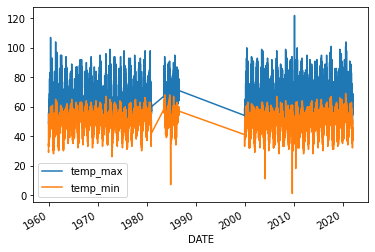

In [173]:
core_weather[["temp_max", "temp_min"]].plot()

In [174]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022     36
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

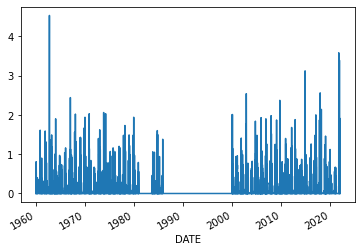

In [175]:
core_weather["precip"].plot()

<AxesSubplot:xlabel='DATE'>

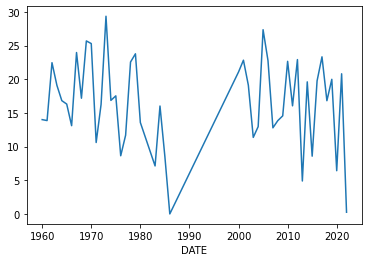

In [176]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [177]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [178]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0,49.0
1960-01-02,0.0,0.0,0.0,49.0,29.0,54.0
1960-01-03,0.0,0.0,0.0,54.0,35.0,54.0
1960-01-04,0.0,0.0,0.0,54.0,36.0,55.0
1960-01-05,0.0,0.0,0.0,55.0,33.0,53.0
...,...,...,...,...,...,...
2022-02-01,0.0,0.0,0.0,63.0,39.0,64.0
2022-02-02,0.0,0.0,0.0,64.0,43.0,60.0
2022-02-03,0.0,0.0,0.0,60.0,37.0,62.0


In [179]:
core_weather = core_weather.iloc[:-1,:].copy()

In [180]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0,49.0
1960-01-02,0.0,0.0,0.0,49.0,29.0,54.0
1960-01-03,0.0,0.0,0.0,54.0,35.0,54.0
1960-01-04,0.0,0.0,0.0,54.0,36.0,55.0
1960-01-05,0.0,0.0,0.0,55.0,33.0,53.0
...,...,...,...,...,...,...
2022-01-31,0.0,0.0,0.0,58.0,43.0,63.0
2022-02-01,0.0,0.0,0.0,63.0,39.0,64.0
2022-02-02,0.0,0.0,0.0,64.0,43.0,60.0


In [181]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [182]:
predictors = ["precip", "temp_max", "temp_min"]

In [183]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [184]:
train

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.00,0.0,0.0,49.0,30.0,49.0
1960-01-02,0.00,0.0,0.0,49.0,29.0,54.0
1960-01-03,0.00,0.0,0.0,54.0,35.0,54.0
1960-01-04,0.00,0.0,0.0,54.0,36.0,55.0
1960-01-05,0.00,0.0,0.0,55.0,33.0,53.0
...,...,...,...,...,...,...
2020-12-27,0.00,0.0,0.0,63.0,44.0,61.0
2020-12-28,0.10,0.0,0.0,61.0,42.0,60.0
2020-12-29,0.00,0.0,0.0,60.0,39.0,56.0


In [185]:
test

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
2021-01-01,0.00,0.0,0.0,60.0,40.0,57.0
2021-01-02,0.14,0.0,0.0,57.0,51.0,56.0
2021-01-03,0.00,0.0,0.0,56.0,49.0,62.0
2021-01-04,0.36,0.0,0.0,62.0,46.0,59.0
2021-01-05,0.00,0.0,0.0,59.0,42.0,59.0
...,...,...,...,...,...,...
2022-01-31,0.00,0.0,0.0,58.0,43.0,63.0
2022-02-01,0.00,0.0,0.0,63.0,39.0,64.0
2022-02-02,0.00,0.0,0.0,64.0,43.0,60.0


In [186]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [187]:
predictions = reg.predict(test[predictors])

In [188]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

20.22535832050034

In [189]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [190]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-31,63.0,58.902819
2022-02-01,64.0,61.789748
2022-02-02,60.0,63.229649


<AxesSubplot:xlabel='DATE'>

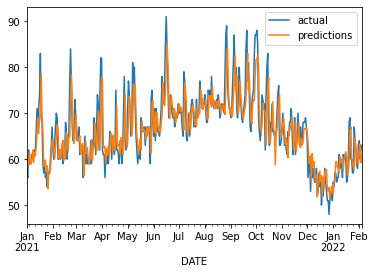

In [191]:
combined.plot()

In [192]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [193]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [194]:
core_weather = core_weather.iloc[30:,:].copy()

In [195]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [196]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error


19.839473854772393

<AxesSubplot:xlabel='DATE'>

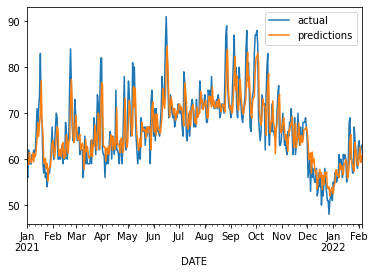

In [197]:
combined.plot()

In [199]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [200]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error

19.05739234760008

In [201]:
reg.coef_

array([-1.07706522,  0.69350145,  0.04696919,  4.78060588,  0.07003167,
        0.16384976,  0.08581002])

In [202]:
core_weather.corr()["target"]

precip            -0.205311
snow              -0.012593
snow_depth              NaN
temp_max           0.821680
temp_min           0.596041
target             1.000000
month_max          0.686920
month_day_max     -0.421325
max_min            0.045151
monthly_avg        0.689866
day_of_year_avg    0.712396
Name: target, dtype: float64

In [203]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [204]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2021-01-17,83.0,68.433744,14.566256
2021-04-01,62.0,75.713379,13.713379
2021-05-07,81.0,67.678091,13.321909
2021-02-21,77.0,64.141065,12.858935
2021-10-16,66.0,78.707594,12.707594
2021-02-22,84.0,71.354231,12.645769
2021-03-30,82.0,69.994973,12.005027
2021-07-07,79.0,67.323738,11.676262
2021-03-29,74.0,62.502014,11.497986
